# Import packages

In [1]:
# Added to be able to run in Google Colab. Run this cell if running the notebook in a hosted runtime. Don't run for a local runtime.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import pickle
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
import random

# Set path names 


In [3]:
# Set paths to image stacks, masks, and annotation files. 

path_to_image = '/content/gdrive/MyDrive/ENSO_project/01_data/02_tiles'
path_to_label = '/content/gdrive/MyDrive/ENSO_project/01_data/04_masks'
# path_to_annotCombo = '/content/gdrive/MyDrive/ENSO_project/01_data/03_annot'

In [4]:
# Set the project name and save directory for the project

project_name = 'Finetuning_allSlides'
trial = 'Trial_01' 

exp_dir = '/content/gdrive/MyDrive/ENSO_project/02_det/exp' # experiment directory
exp_dir = os.path.join(exp_dir, project_name)
save_dir = os.path.join(exp_dir, trial) 
if not os.path.exists(save_dir): 
    os.makedirs(save_dir)

# Split data into training and test (validation) sets

In [8]:
# Make a list of the names of all samples. The list is not randomized. 
tmpSampleList = []

for slide in os.listdir(path_to_label):
  cur_path_to_label = os.path.join(path_to_label, slide)
  for sample in os.listdir(cur_path_to_label):
    if slide != 'labelme':
      tmpSampleList.append((slide, sample))

for slide in os.listdir(os.path.join(path_to_label, 'labelme')):
  cur_path_to_label = os.path.join(path_to_label, 'labelme', slide)
  for sample in os.listdir(cur_path_to_label):
      tmpSampleList.append(('labelme/'+slide, sample))



random.shuffle(tmpSampleList)

print(len(tmpSampleList))
print(tmpSampleList)

1532
[('labelme/PAL1999_C6_sample1_slide2', '41392x_42080y'), ('PAL1999_C1_sample55_slide1', '112152x_66521y'), ('labelme/PAL1999_C3_sample1_slide2', '49744x_57680y'), ('PAL1999_C1_sample55_slide1', '90489x_41471y'), ('labelme/PAL1999_C6_sample1_slide2', '59488x_48320y'), ('PAL1999_C3_sample67_slide1', '15558x_47045y'), ('labelme/PAL1999_C6_sample1_slide2', '44176x_48320y'), ('labelme/PAL1999_C6_sample1_slide2', '58096x_42080y'), ('PAL1999_B2_sample71_slide1', '58704x_94366y'), ('PAL1999_C6_sample51_slide1', '34584x_47477y'), ('labelme/PAL1999_C3_sample1_slide2', '48352x_41040y'), ('PAL1999_C6_sample51_slide1', '36336x_15358y'), ('PAL1999_C6_sample21_slide1', '48422x_40313y'), ('labelme/PAL1999_C6_sample1_slide2', '51136x_46240y'), ('PAL1999_C1_sample35_slide1', '11629x_79807y'), ('labelme/PAL1999_C6_sample1_slide2', '46960x_47280y'), ('labelme/PAL1999_C3_sample1_slide2', '49744x_42080y'), ('PAL1999_C3_sample21_slide1', '8742x_40930y'), ('labelme/PAL1999_C6_sample1_slide2', '55312x_556

In [9]:
# Split the dataset into 80% training and 20% test (validation) sets

train_det_dict = {}
test_det_dict = {}
train_det_list = []
test_det_list = []

trRatio = 0.8
if len(tmpSampleList)>0:
    trNum = round(len(tmpSampleList)*trRatio)
    tsNum = len(tmpSampleList) - trNum
    start_num = tsNum*1   # You may change the multiplier for each trial to test different splits of data. e.g. 4 for trial 1, 0 for trial 2, 1 for trial 3.
    
    train_det_list += tmpSampleList[0:start_num]
    test_det_list += tmpSampleList[start_num:start_num + tsNum]    
    train_det_list += tmpSampleList[start_num + tsNum:]          
else: 
    train_det_list += tmpSampleList

In [10]:
# Save all the info in a pickle file to be read in the next notebook

dbinfo = {}
dbinfo['train_det_list'] = train_det_list
dbinfo['test_det_list'] = test_det_list

with open(os.path.join(save_dir,'dbinfo.pkl'), 'wb') as handle:
    pickle.dump(dbinfo, handle) # , protocol=pickle.HIGHEST_PROTOCOL

In [11]:
# See the lengths of the training and test datasets

with open(os.path.join(save_dir,'dbinfo.pkl'), 'rb') as handle:
    dbinfo = pickle.load(handle)

dbinfo.keys(), len(dbinfo['train_det_list']), len(dbinfo['test_det_list'])

(dict_keys(['train_det_list', 'test_det_list']), 1226, 306)

In [12]:
dbinfo['train_det_list']

[('labelme/PAL1999_C6_sample1_slide2', '41392x_42080y'),
 ('PAL1999_C1_sample55_slide1', '112152x_66521y'),
 ('labelme/PAL1999_C3_sample1_slide2', '49744x_57680y'),
 ('PAL1999_C1_sample55_slide1', '90489x_41471y'),
 ('labelme/PAL1999_C6_sample1_slide2', '59488x_48320y'),
 ('PAL1999_C3_sample67_slide1', '15558x_47045y'),
 ('labelme/PAL1999_C6_sample1_slide2', '44176x_48320y'),
 ('labelme/PAL1999_C6_sample1_slide2', '58096x_42080y'),
 ('PAL1999_B2_sample71_slide1', '58704x_94366y'),
 ('PAL1999_C6_sample51_slide1', '34584x_47477y'),
 ('labelme/PAL1999_C3_sample1_slide2', '48352x_41040y'),
 ('PAL1999_C6_sample51_slide1', '36336x_15358y'),
 ('PAL1999_C6_sample21_slide1', '48422x_40313y'),
 ('labelme/PAL1999_C6_sample1_slide2', '51136x_46240y'),
 ('PAL1999_C1_sample35_slide1', '11629x_79807y'),
 ('labelme/PAL1999_C6_sample1_slide2', '46960x_47280y'),
 ('labelme/PAL1999_C3_sample1_slide2', '49744x_42080y'),
 ('PAL1999_C3_sample21_slide1', '8742x_40930y'),
 ('labelme/PAL1999_C6_sample1_slide2'

In [13]:
dbinfo['test_det_list']

[('PAL1999_C1_sample55_slide1', '103666x_11481y'),
 ('labelme/PAL1999_C6_sample1_slide2', '48352x_45200y'),
 ('labelme/PAL1999_C6_sample1_slide2', '45568x_52480y'),
 ('PAL1999_C1_sample35_slide1', '12481x_12219y'),
 ('PAL1999_C1_sample15_slide1', '63366x_10448y'),
 ('PAL1999_B2_sample101_slide1', '65226x_32151y'),
 ('labelme/PAL1999_C6_sample1_slide2', '40000x_58720y'),
 ('labelme/PAL1999_C3_sample1_slide2', '55312x_50400y'),
 ('labelme/PAL1999_C3_sample1_slide2', '56704x_56640y'),
 ('labelme/PAL1999_C6_sample1_slide2', '51136x_49360y'),
 ('labelme/PAL1999_C6_sample1_slide2', '49744x_57680y'),
 ('PAL1999_C3_sample67_slide1', '50290x_32796y'),
 ('PAL1999_B2_sample71_slide1', '86294x_20781y'),
 ('labelme/PAL1999_C3_sample1_slide2', '56704x_43120y'),
 ('labelme/PAL1999_C3_sample43_slide1', '37584x_68640y'),
 ('PAL1999_C1_sample35_slide1', '58650x_79798y'),
 ('labelme/PAL1999_C6_sample1_slide2', '52528x_52480y'),
 ('labelme/PAL1999_C3_sample1_slide2', '53920x_45200y'),
 ('PAL1999_B2_sample

# Visualize an image and mask

In [17]:
set_name='test'  #'test'
sampleList = dbinfo[set_name+'_det_list']

idx = 0  #choose an index less than or equal to the length of the sampleList

current_example= sampleList[idx] 
current_image_path= os.path.join(path_to_image, current_example[0], current_example[1])
current_distTransform_path=os.path.join(path_to_label, current_example[0],current_example[1] )

z = 4     # set to the desired z-plane (0, 8)
img_stack_paths = []
for file in sorted(os.listdir(str(current_image_path))):
    if file.endswith('.png'):
      tmpImg = os.path.join(str(current_image_path), file)
      img_stack_paths.append(tmpImg)
image = PIL.Image.open(img_stack_paths[z])

for file in os.listdir(current_distTransform_path):
  if file.endswith('.png'):
    mask_distanceTransform = PIL.Image.open(os.path.join(current_distTransform_path, file))
    mask_distanceTransform=np.array(mask_distanceTransform)

In [18]:
print(current_example)

('PAL1999_C1_sample55_slide1', '103666x_11481y')


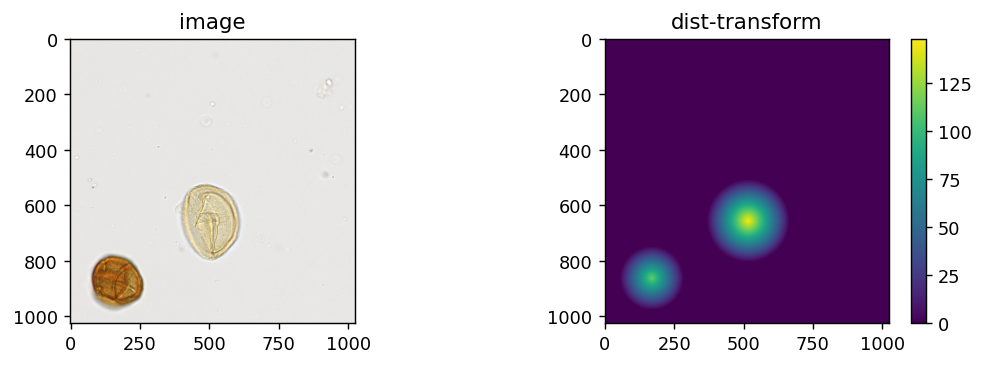

In [19]:
numSample2Show = 1
figWinNumHeight, figWinNumWidth = 3, 2
plt.figure(figsize=(10, 10), dpi=128, facecolor='w', edgecolor='k') # figsize -- inch-by-inch
plt.clf()
subwinCount = 1    


plt.subplot(figWinNumHeight,figWinNumWidth,subwinCount)
subwinCount += 1
plt.imshow(image)
#plt.axis('off')
plt.title('image')


plt.subplot(figWinNumHeight,figWinNumWidth,subwinCount)
subwinCount += 1
plt.imshow(mask_distanceTransform)
#plt.axis('off')
plt.title('dist-transform')
plt.colorbar()